# Speed Dating
this dataset comes from https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating , which in turn is derived from http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/. A series of 21 speed-dating events were held in 2002-2004, and data was collected about participants before and during the event. The dataset includes information about participants' age, gender, race, attributes, priorities, interests, and reactions to one another.

### 1. Import libraries

In [105]:
import pandas as pd
import numpy as np

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score,precision_score,balanced_accuracy_score
import missingno
import xgboost as xgb

#deal with imbalance data
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

# Datavisualiztion
import matplotlib.pyplot as plt
import seaborn as sns

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
RANDOM_SEED = 42

import re

#outlier
from scipy import stats

In [104]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 2. Import Data
 records = 8378  and column = 123

In [51]:
dating = pd.read_csv('speeddating.csv')
print('Data size: ',dating.shape)


Data size:  (8378, 123)


In [52]:
pd.set_option('display.max_columns', None)  # to see all column
dating.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

### 3. Exploratory Data Analysis
we going to perform EDA both categorical and numerical columns of data set

#### 3.1 First glimpse of data 

In [53]:
## Looking at data type of data set
dating.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         8378 non-null   object 
 1    wave                             8378 non-null   float64
 2    gender                           8378 non-null   object 
 3    age                              8283 non-null   float64
 4    age_o                            8274 non-null   float64
 5    d_age                            8378 non-null   float64
 6    d_d_age                          8378 non-null   object 
 7    race                             8378 non-null   object 
 8    race_o                           8378 non-null   object 
 9    samerace                         8378 non-null   object 
 10   importance_same_race             8299 non-null   float64
 11   importance_same_religion         8299 non-null   float64
 12   d_im

In [54]:
dating.dtypes.value_counts()

object     64
float64    59
dtype: int64

64 column of data are object(string)  
59 column of data are float  
123 column total

In [55]:
pd.set_option('display.max_rows', None)
dating.nunique().sort_values()

has_null                             1
decision                             2
decision_o                           2
samerace                             2
match                                2
gender                               2
d_gaming                             3
d_funny_o                            3
d_ambitous_o                         3
d_shared_interests_o                 3
d_music                              3
d_concerts                           3
d_movies                             3
d_theater                            3
d_tv                                 3
d_reading                            3
d_attractive_important               3
d_sincere_important                  3
d_intellicence_important             3
d_funny_important                    3
d_ambtition_important                3
d_shared_interests_important         3
d_hiking                             3
d_ambition_partner                   3
d_funny_partner                      3
d_intelligence_partner   

In [56]:
dating.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000

#### 3.2 Missing value

In [57]:
# find missing values
missing_values = dating.isnull().sum()

# print the number of missing values in each column
print('Missing values in the dataset:\n')
counter = 0
for column_name, count in missing_values.items():
    if count > 0:
        print('Column: {} - {}'.format(column_name, count))
        counter += 1

print('the total missing value column  : {} columns'.format(counter))

Missing values in the dataset:

Column: age - 95
Column: age_o - 104
Column: importance_same_race - 79
Column: importance_same_religion - 79
Column: pref_o_attractive - 89
Column: pref_o_sincere - 89
Column: pref_o_intelligence - 89
Column: pref_o_funny - 98
Column: pref_o_ambitious - 107
Column: pref_o_shared_interests - 129
Column: attractive_o - 212
Column: sinsere_o - 287
Column: intelligence_o - 306
Column: funny_o - 360
Column: ambitous_o - 722
Column: shared_interests_o - 1076
Column: attractive_important - 79
Column: sincere_important - 79
Column: intellicence_important - 79
Column: funny_important - 89
Column: ambtition_important - 99
Column: shared_interests_important - 121
Column: attractive - 105
Column: sincere - 105
Column: intelligence - 105
Column: funny - 105
Column: ambition - 105
Column: attractive_partner - 202
Column: sincere_partner - 277
Column: intelligence_partner - 296
Column: funny_partner - 350
Column: ambition_partner - 712
Column: shared_interests_partner 

##### There are  57 column that contain missing value in dataset

<Axes: >

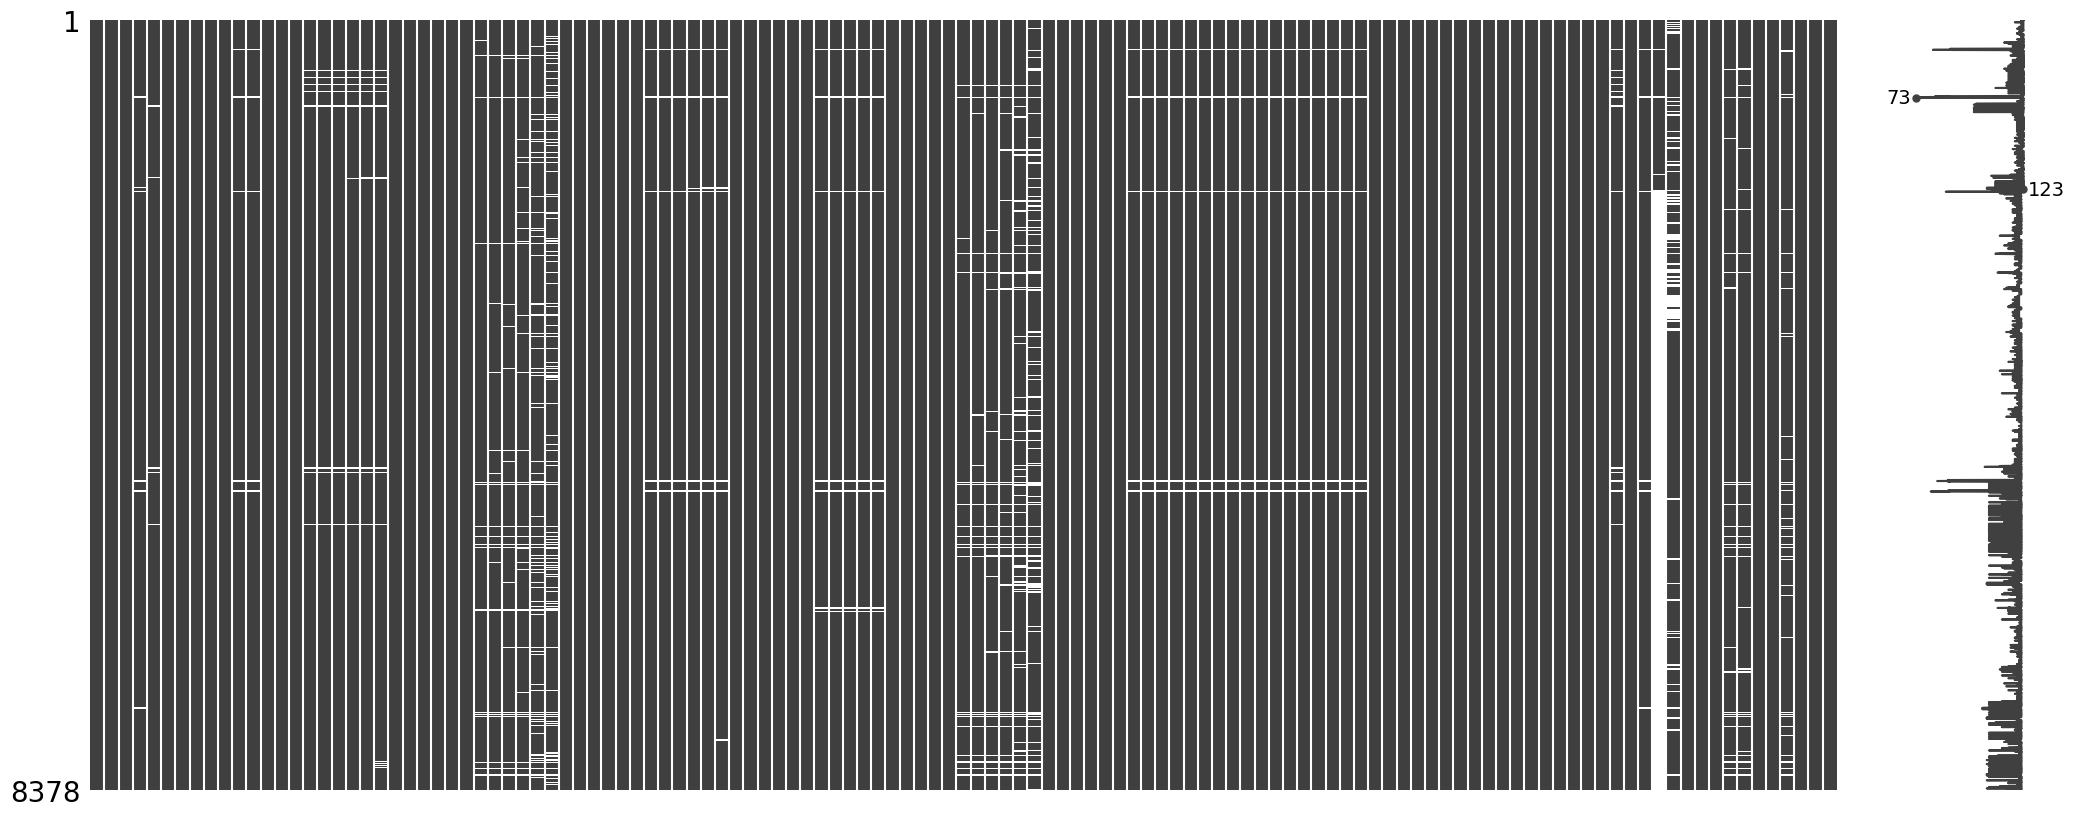

In [58]:
### Visual representation of the missing data in the dataset

missingno.matrix(dating)

# sort missing value then drop row

#### 3.3 Age distribution

Age of the owner

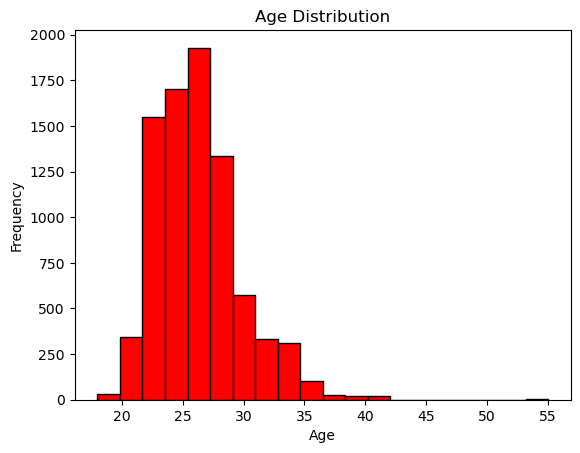

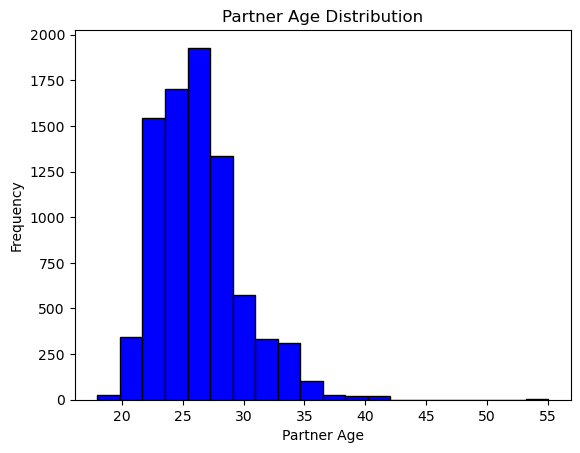

In [59]:
# Extract the "Age" column from the DataFrame
ages = dating['age']

# Create a histogram of the "Age" column
plt.hist(ages, bins=20, color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


# Extract the "Age_o" column from the DataFrame
agespartner = dating['age_o']

# Create a histogram of the "Age" column
plt.hist(agespartner, bins=20, color='blue', edgecolor='black')
plt.xlabel('Partner Age')
plt.ylabel('Frequency')
plt.title('Partner Age Distribution')
plt.show()


Boxplot age

<Axes: >

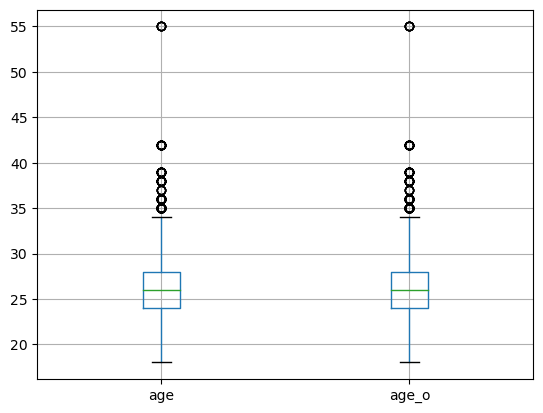

In [60]:
dating[['age', 'age_o']].boxplot()

Since there is outlier the age is 55 is identify as outlier
💥ควรลบหรือไม่ลบ

In [61]:
#histogram strew right -> fill with median
#age column
impute_median = dating['age'].median()
dating['age'] = dating['age'].fillna(impute_median)

In [62]:
#fill age_o with median
impute_median_o = dating['age_o'].median()
dating['age_o'] = dating['age_o'].fillna(impute_median)

In [63]:
print('missing value in age column:', dating['age'].isnull().sum())
print('missing value in age_o column:', dating['age_o'].isnull().sum())

missing value in age column: 0
missing value in age_o column: 0


age and age_o บางทีอาจจะเกิดการซ้ำซ้อนกัน เช่น row 1 เป็น A จับกับ B / row 2 เป้น B จับกับ A

Outliers 'age'

In [ ]:
# model identify outlier but cannot deal with missing value
#from sklearn.cluster import DBSCAN

# Create a DBSCAN model
#dbscan = DBSCAN(eps=10, min_samples=2)

# Reshape the 'age' column of 'dating' dataframe to a 2D array
#ageD = dating['age'].values.reshape(-1, 1)

# Fit the model to the data
#dbscan.fit(ageD)

# Identify outliers based on DBSCAN labels
#outliers = np.where(dbscan.labels_ == -1)[0]

#print("Outliers detected at index:", outliers)

In [14]:
#z = np.abs(stats.zscore(dating['age'], nan_policy='omit'))
#print(z.sort_values(ascending = False))

6827    8.030476
6826    8.030476
6825    8.030476
6824    8.030476
6823    8.030476
6822    8.030476
3343    4.385494
3340    4.385494
3347    4.385494
3346    4.385494
3345    4.385494
3344    4.385494
3342    4.385494
3341    4.385494
3339    4.385494
3338    4.385494
3337    4.385494
3336    4.385494
3335    4.385494
3334    4.385494
3333    4.385494
3332    4.385494
3331    4.385494
3330    4.385494
3329    4.385494
3328    4.385494
1407    3.544344
1410    3.544344
1409    3.544344
1408    3.544344
1411    3.544344
1406    3.544344
1405    3.544344
1413    3.544344
1412    3.544344
1404    3.544344
1414    3.544344
1416    3.544344
1417    3.544344
1418    3.544344
1419    3.544344
1420    3.544344
1421    3.544344
1415    3.544344
5750    3.263961
5759    3.263961
5758    3.263961
5749    3.263961
5754    3.263961
5751    3.263961
5752    3.263961
5753    3.263961
5761    3.263961
5755    3.263961
5760    3.263961
5744    3.263961
5762    3.263961
5748    3.263961
5747    3.2639

In [15]:
# Use np.where to find the indices of values that are greater than 3 standard deviations from the mean
#outliers = np.where(z > 3)[0]

#print("Outliers detected at index:", outliers)

Outliers detected at index: [1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417
 1418 1419 1420 1421 3328 3329 3330 3331 3332 3333 3334 3335 3336 3337
 3338 3339 3340 3341 3342 3343 3344 3345 3346 3347 5744 5745 5746 5747
 5748 5749 5750 5751 5752 5753 5754 5755 5756 5757 5758 5759 5760 5761
 5762 6822 6823 6824 6825 6826 6827]


In [92]:
# IQR
#Q1 = np.percentile(dating['age'], 25, interpolation = 'midpoint')
 
#Q3 = np.percentile(dating['age'], 75, interpolation = 'midpoint')

#IQR = Q3 - Q1

# Above Upper bound
#upper=Q3+1.5*IQR
#upper_array=np.array(dating['age']>=upper)
#print('Upper Bound:',upper)
#print(upper_array)
 
#Below Lower bound
#lower=Q1-1.5*IQR
#lower_array=np.array(dating['age']<=lower)
#print('Lower Bound:',lower)
#print(lower_array)

Upper Bound: nan
[False False False ... False False False]
Lower Bound: nan
[False False False ... False False False]


Outlier 'age_o'

In [95]:
#z_o = np.abs(stats.zscore(dating['age_o'], nan_policy='omit'))
#print(z_o.sort_values(ascending = False))

6855    8.035791
6861    8.035791
6873    8.035791
6867    8.035791
6843    8.035791
6849    8.035791
2844    4.387623
2864    4.387623
2884    4.387623
2964    4.387623
2904    4.387623
2784    4.387623
2924    4.387623
2944    4.387623
2984    4.387623
3004    4.387623
2824    4.387623
2804    4.387623
2744    4.387623
2724    4.387623
2704    4.387623
2684    4.387623
2664    4.387623
2764    4.387623
2644    4.387623
2624    4.387623
1318    3.545738
1030    3.545738
1174    3.545738
1066    3.545738
1048    3.545738
1012    3.545738
1120    3.545738
1156    3.545738
1138    3.545738
1192    3.545738
1300    3.545738
1228    3.545738
1102    3.545738
1282    3.545738
1264    3.545738
1246    3.545738
1084    3.545738
1210    3.545738
6140    3.265110
6284    3.265110
6374    3.265110
6338    3.265110
6320    3.265110
6176    3.265110
6302    3.265110
6392    3.265110
6410    3.265110
6230    3.265110
6266    3.265110
6248    3.265110
6194    3.265110
6158    3.265110
6086    3.2651

In [98]:
# Use np.where to find the indices of values that are greater than 3 standard deviations from the mean
#outliers_o = np.where(z_o > 3)[0]

#print("Outliers detected at index:", outliers_o)

Outliers detected at index: [1012 1030 1048 1066 1084 1102 1120 1138 1156 1174 1192 1210 1228 1246
 1264 1282 1300 1318 2624 2644 2664 2684 2704 2724 2744 2764 2784 2804
 2824 2844 2864 2884 2904 2924 2944 2964 2984 3004 6086 6104 6122 6140
 6158 6176 6194 6212 6230 6248 6266 6284 6302 6320 6338 6356 6374 6392
 6410 6843 6849 6855 6861 6867 6873]


In [99]:
# IQR
#Q1_o = np.percentile(dating['age_o'], 25, interpolation = 'midpoint')
 
#Q3_o = np.percentile(dating['age_o'], 75, interpolation = 'midpoint')

#IQR_o = Q3_o - Q1_o

# Above Upper bound
#upper_o=Q3_o+1.5*IQR_o
#upper_o_array=np.array(dating['age_o']>=upper)
#print('Upper Bound:',upper_o)
#print(upper_o_array)
 
#Below Lower bound
#lower_o=Q1_o-1.5*IQR_o
#lower_o_array=np.array(dating['age_o']<=lower)
#print('Lower Bound:',lower_o)
#print(lower_o_array)

Upper Bound: nan
[False False False ... False False False]
Lower Bound: nan
[False False False ... False False False]


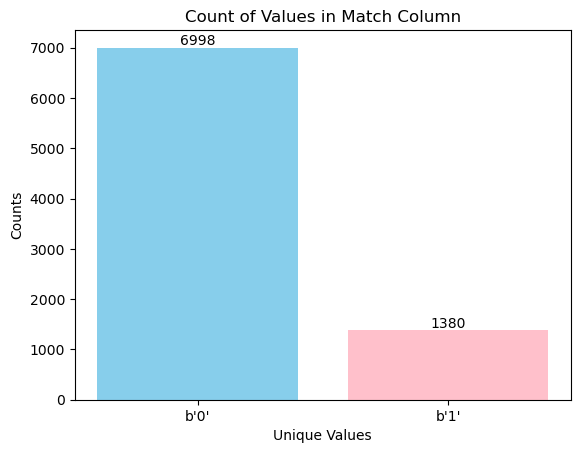

In [64]:
# Plot the distribution of the target variable
match_value_counts = dating['match'].value_counts()

# Create a bar chart
plt.bar(match_value_counts.index, match_value_counts.values, color=['skyblue','pink'])

# Add labels to each bar with count
for xbar, ybar in zip(match_value_counts.index, match_value_counts.values):
    plt.text(xbar, ybar, str(ybar), ha='center', va='bottom')

# Set the title and labels for the chart
plt.title('Count of Values in Match Column')
plt.xlabel('Unique Values')
plt.ylabel('Counts')

# Display the chart
plt.show()

This chart show that there is imbalance data in this dataframe.

### 4. Data Preprocessing

#### 4.1 Checking column data types

In [65]:
dating.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
d_age                              float64
d_d_age                             object
race                                object
race_o                              object
samerace                            object
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race              object
d_importance_same_religion          object
field                               object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                 object
d_pref_o_sincere                    object
d_pref_o_in

#### 4.2 Removing unwanted characters
All string columns have an unwanted character 'b' and are enclosed by single quotes. We will remove these characters from the columns.

In [66]:
dating.head(3)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

In [67]:
# Drop the has_null and wave columns
dating.drop(['has_null','wave','expected_num_interested_in_me'], axis = 1, inplace= True)

The same race variable is a string data type. We convert it to numeric

In [68]:
# We create a function that removes all the unwanted characters
def remove_xters(feature):
    return feature.replace("b'",'').replace("'","")
def remove_sqbrackets(feature):
    return feature.replace("[",'').replace("]","")

# We select string columns and apply the transformation
string_dataset = dating.select_dtypes(include = ['object'])

for feature in string_dataset.columns:
    dating[feature] = dating[feature].apply(lambda x: remove_xters(x))
    dating[feature] = dating[feature].apply(lambda x: remove_sqbrackets(x))
    
dating[string_dataset.columns].head(3)

,gender,d_d_age,race,race_o,samerace,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,female,4-6,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2-5,2-5,Law,21-100,16-20,16-20,16-20,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,9-10,6-8,6-8,6-8,0-5,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0-0.33,0-4,0-3,3-5,6-8,5-6,1,0,0
1,female,0-1,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2-5,2-5,Law,21-100,0-15,0-15,21-100,0-15,0-15,6-8,6-8,9-10,6-8,6-8,0-5,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,6-8,6-8,6-8,0-5,6-8,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0.33-1,0-4,0-3,3-5,6-8,5-6,1,0,0
2,female,0-1,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2-5,2-5,Law,16-20,16-20,16-20,16-20,0-15,0-15,9-10,9-10,9-10,9-10,9-10,9-10,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,0-5,6-8,9-10,6-8,0-5,6-8,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0-0.33,0-4,0-3,3-5,6-8,0-4,1,1,1


In [115]:
#dating['samerace'] = dating['samerace'].astype('int')

In [124]:
#cols_to_drop = dating.columns[dating.columns.str.contains('d_')]

# Drop the identified columns
#dating.drop(cols_to_drop, axis=1, inplace=True)

# Display the DataFrame after dropping columns
#dating.head(10)

,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,35.00,20.00,20.00,20.00,0.00,6.0,8.0,8.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,60.00,0.00,0.00,40.00,0.00,7.0,8.0,10.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
2,female,21.0,22.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,19.00,18.00,19.00,18.00,14.00,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1,1
3,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,30.00,5.00,15.00,40.00,5.00,7.0,8.0,9.0,8.0,9.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,30.00,10.00,20.00,10.00,10.00,8.0,7.0,9.0,6.0,9.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1
5,female,21.0,25.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,50.00,0.00,30.00,10.00,0.00,7.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0
6,female,21.0,30.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,35.00,15.00,25.00,10.00,5.00,3.0,6.0,7.0,5.0,8.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,7.0,4.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.34,6.0,5.0,0.0,1,0,0
7,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,33.33,11.11,11.11,11.11,11.11,6.0,7.0,5.0,6.0,8.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.50,6.0,7.0,NaN,0,0,0
8,female,21.0,28.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,50.00,0.00,25.00,10.00,0.00,7.0,7.0,8.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,9.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.28,7.0,7.0,0.0,1,1,1
9,female,21.0,24.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,100.00,0.00,0.00,0.00,0.00,6.0,6.0,6.0,6.0,6.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,6.0,8.0,10.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,-0.36,6.0,6.0,0.0,1,0,0


In [69]:
print('Data size: ',dating.shape)
dating.dtypes.value_counts()

Data size:  (8378, 120)


object     63
float64    57
dtype: int64

In [70]:
#check type each columns
for col in dating.columns:
    print(col+": "+str(dating[col].dtypes))

gender: object
age: float64
age_o: float64
d_age: float64
d_d_age: object
race: object
race_o: object
samerace: object
importance_same_race: float64
importance_same_religion: float64
d_importance_same_race: object
d_importance_same_religion: object
field: object
pref_o_attractive: float64
pref_o_sincere: float64
pref_o_intelligence: float64
pref_o_funny: float64
pref_o_ambitious: float64
pref_o_shared_interests: float64
d_pref_o_attractive: object
d_pref_o_sincere: object
d_pref_o_intelligence: object
d_pref_o_funny: object
d_pref_o_ambitious: object
d_pref_o_shared_interests: object
attractive_o: float64
sinsere_o: float64
intelligence_o: float64
funny_o: float64
ambitous_o: float64
shared_interests_o: float64
d_attractive_o: object
d_sinsere_o: object
d_intelligence_o: object
d_funny_o: object
d_ambitous_o: object
d_shared_interests_o: object
attractive_important: float64
sincere_important: float64
intellicence_important: float64
funny_important: float64
ambtition_important: float64


#### 4.3 Dropping columns

##### 4.3.1 remove in each row if that row contain missing value more than 5 columns


We going to remove row that contain missing value from top 5% of the total as a rule of thumb 
###### Ref: https://www.hubresearch.ca/bridging-the-data-gap-how-to-deal-with-missing-data-in-observational-studies/#:~:text=As%20a%20rule%20of%20thumb,any%20significant%20ramifications%20(3).


In [71]:
missing_values = dating.isnull().sum(axis=1)
threshold = 5
rows_with_too_many_missing_values = dating[missing_values > threshold]
num_rows_with_too_many_missing_values = len(rows_with_too_many_missing_values)
print("Sum of rows with too many missing values:", num_rows_with_too_many_missing_values)

Sum of rows with too many missing values: 429


In [72]:
dating = dating.dropna(thresh=dating.shape[1]-threshold)
num_missing = dating.isna().sum()
print(num_missing)

gender                                0
age                                   0
age_o                                 0
d_age                                 0
d_d_age                               0
race                                  0
race_o                                0
samerace                              0
importance_same_race                  0
importance_same_religion              0
d_importance_same_race                0
d_importance_same_religion            0
field                                 0
pref_o_attractive                     0
pref_o_sincere                        0
pref_o_intelligence                   0
pref_o_funny                          9
pref_o_ambitious                     18
pref_o_shared_interests              38
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0
d_pref_o_ambitious                    0
d_pref_o_shared_interests             0


<Axes: >

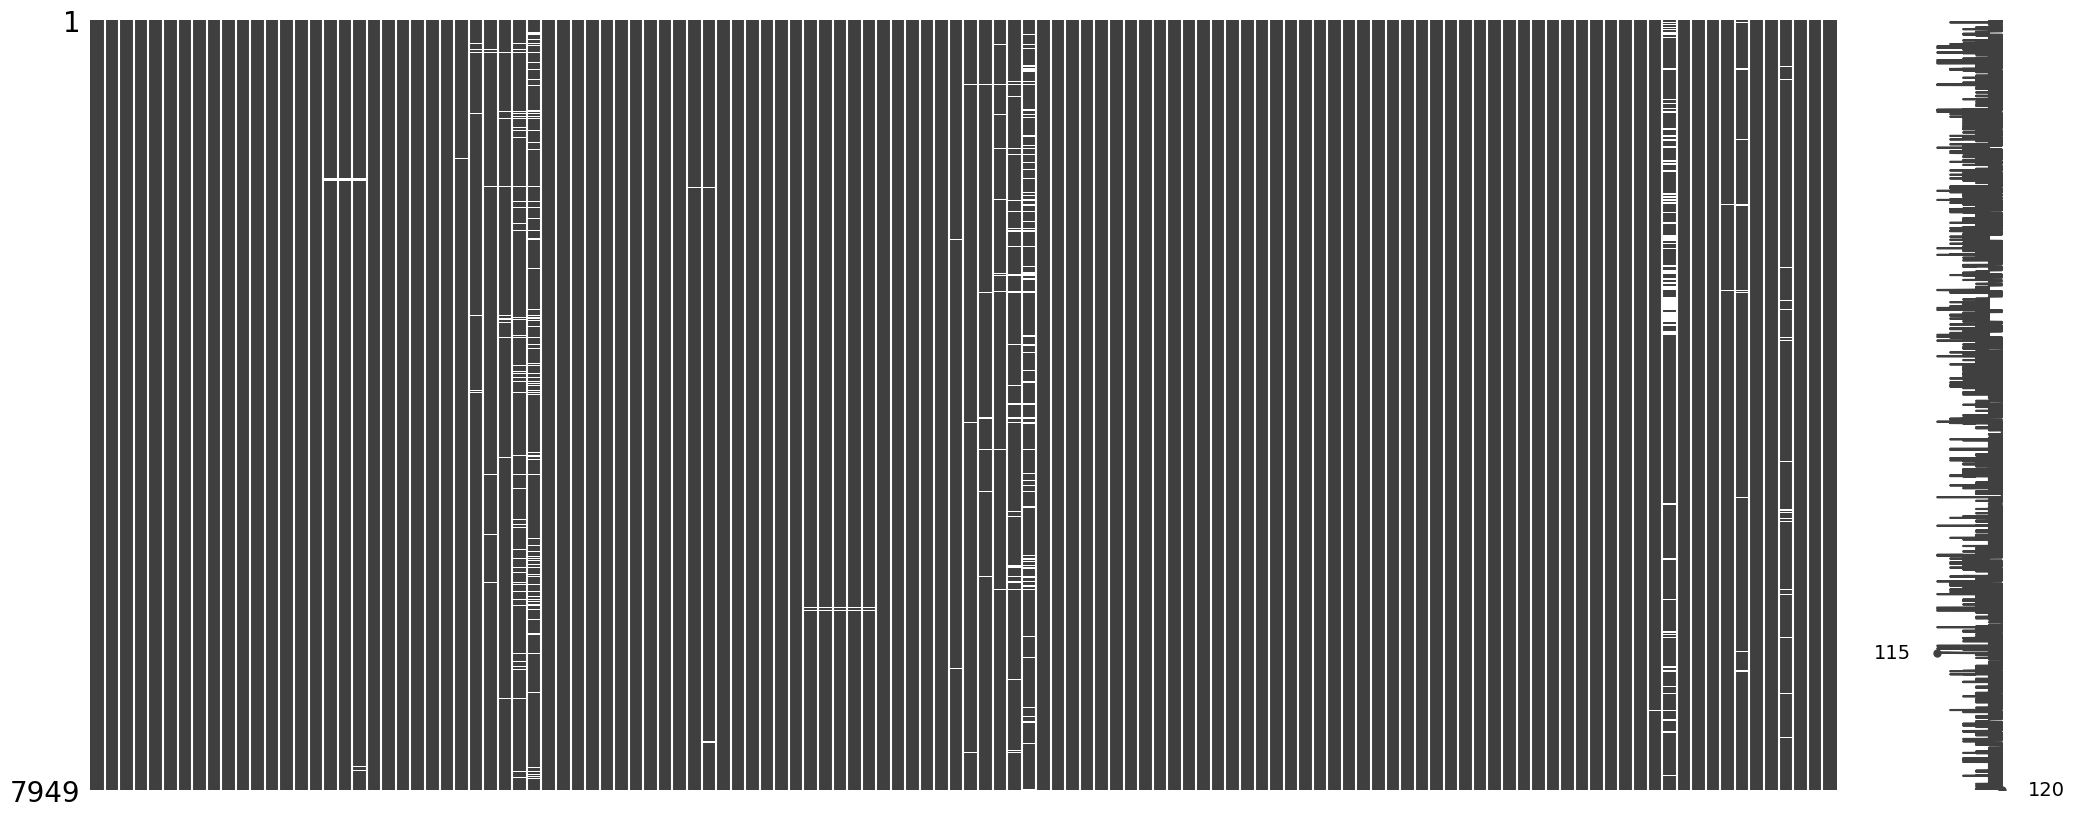

In [73]:
### Visual representation of the missing data in the dataset
missingno.matrix(dating)

##### 4.3.2 Age
There are four different columns for age and these are: age of individual, age of partner, age difference, and age group (where ages have been binned into categories). However the age difference column is not standardized since the difference is between the higher age and the lower age. We will standardize the difference by subtracting age between each individual and their partner. Since the direction of the difference matters, the column will have both positive and negative values. We will then drop the other age columns

In [74]:
# Create age difference column
dating['age_diff'] = dating['age'] - dating['age_o']

# Drop other age columns
dating.drop(['age','age_o', 'd_age', 'd_d_age'], axis = 1, inplace = True)

##### 4.3.3 Binned variables
The speed dating dataset has some of the numeric features binned into categories. This is a duplication of information which increases the dimensionality of the dataset without adding any significant value. We will remove all the duplicated features. Conveniently, the names of these binned features have the prefix "d_". We will use this to subset and remove these features. Before the selection, the dataset has 118 features, and after the selection, we remain with 64 features.


In [75]:
dating.shape

(7949, 117)

In [76]:
to_drop = [column_name for column_name in dating.columns if column_name.startswith('d_')]
dating.drop(to_drop, axis = 1, inplace = True)
dating.head()

,gender,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match,age_diff
0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,1,0,0,-6.0
1,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,1,0,0,-1.0
2,female,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,NaN,1.0,1,1,1,-1.0
3,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,1,1,-2.0
4,female,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,1,1,-3.0


In [77]:
dating.shape

(7949, 63)

##### 4.3.4 Field
In the individual field indicating their careers, there's an overlapping of values. For instance, Business, which is the most popular field still comprises of MBA (2nd most popular), Finance, business [MBA] etc. Physics, Chemistry, Biology all fall under science. Due to this variation and overlapping, we will drop the column

In [78]:
display(dating.field.value_counts().head(30))
dating.drop('field',axis = 1, inplace = True)

Business                  495
Law                       441
MBA                       435
Social Work               370
International Affairs     246
Electrical Engineering    154
Psychology                133
law                       119
Finance                   112
business                  101
Mathematics                95
Film                       90
Sociology                  88
Biology                    85
Business MBA               76
Engineering                75
Biochemistry               67
Political Science          67
Clinical Psychology        66
Economics                  65
chemistry                  57
Physics                    56
Education                  55
Operations Research        54
School Psychology          52
sociology                  51
medicine                   51
Urban Planning             48
Mechanical Engineering     48
English                    45
Name: field, dtype: int64

In [79]:
dating.shape

(7949, 62)

##### 4.3.5 Met
The variable met answers the question as to whether the person has previously met the partner. Since the responses are either yes(1) or no (0), we will clean the column and change responses with neither values, and replace them with the most frequent value. Since they are only a few values, they will not skew our data.

In [80]:
print(f'Before \n{dating.met.value_counts()}')

for number in [3.0, 5.0, 6.0, 7.0, 8.0]:
    dating['met'].replace(number,0, inplace =True)
    
print(f'\nAfter \n{dating.met.value_counts()}')

Before 
0.0    7428
1.0     336
7.0       3
5.0       2
3.0       1
8.0       1
Name: met, dtype: int64

After 
0.0    7435
1.0     336
Name: met, dtype: int64


##### 4.3.6 Variables similar to the y variable
The two variables 'decision' and 'decision_o' have similar responses almost similar to the variable being predicted. We will therefore remove these two features.

In [81]:
display(dating.groupby('decision')['match'].value_counts())
print()
display(dating.groupby('decision_o')['match'].value_counts())

dating.drop(['decision_o','decision'], axis = 1, inplace = True)

decision  match
0         0        4542
1         0        2063
          1        1344
Name: match, dtype: int64

decision_o  match
0           0        4541
1           0        2064
            1        1344
Name: match, dtype: int64

#### 4.4 Numeric and categorical columns

In [82]:
# Selecting numeric columns
columns_numeric = dating.select_dtypes(include = ['int','float']).columns.tolist()

# Selecting categorical columns
columns_category = dating.select_dtypes(include = ['object']).drop('match', axis=1).columns

### 5. Split dataset into training and test set

In [87]:
X = dating.drop('match', axis = 1)
y = dating['match'].astype('int')

In [ ]:
#deal with imbalance data
#work with numeric data only, and cannot handle categorical or string columns directly. 

# Instantiate SMOTEENN
sampler = SMOTEENN(random_state=33)

# Perform undersampling and oversampling on your feature and target data
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# X is your feature data, y is your target data

# Print the counts of each class in the training set after undersampling and oversampling
print("Training set class counts after combining undersampling and oversampling: ", np.bincount(y_train))

# Print the counts of each class in the test set
print("Test set class counts: ", np.bincount(y_test))

In [90]:
# Instantiate RandomUnderSampler
sampler = RandomUnderSampler(random_state=33)

# Perform undersampling on your feature and target data
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# X is your feature data, y is your target data

# Print the counts of each class in the training set after undersampling
print("Training set class counts after undersampling: ", np.bincount(y_train))

# Print the counts of each class in the test set
print("Test set class counts: ", np.bincount(y_test))

Training set class counts after undersampling:  [1068 1082]
Test set class counts:  [276 262]


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33 )

### 6.Imputing, scaling and encoding

#### 6.1 Numeric variables
Numeric variables will be imputed by filling missing values with the median value and standardized using the standard scaler.

In [91]:
# Instantiate the numeric imputer and scaler
num_imp = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

In [92]:
# Impute the training set
X_train_imp = num_imp.fit_transform(X_train[columns_numeric])

# Scale the training set
X_train_imp_scaled = scaler.fit_transform(X_train_imp)

# Convert the training set to a dataframe
X_train_num_final = pd.DataFrame(X_train_imp_scaled, columns = columns_numeric)

In [93]:
# Impute the test set
X_test_imp = num_imp.fit_transform(X_test[columns_numeric])

# Scale the test set
X_test_imp_scaled = scaler.fit_transform(X_test_imp)

# Convert the test set to a dataframe
X_test_num_final = pd.DataFrame(X_test_imp_scaled, columns = columns_numeric)

#### 6.2 Categorical variables¶
Categorical variables will be imputed by filling missing values with the value "Unknown". The variables will then be encoded into numeric values using the dictvectorizer.

In [94]:
# Instantiate the categorical imputer and the dictvectorizer
cat_imp = SimpleImputer(missing_values = '?', fill_value = 'Unknown', strategy = 'constant')
vectorizer = DictVectorizer(sparse = False)

In [95]:
# Impute the training set
X_train_imp = cat_imp.fit_transform(X_train[columns_category])

# Convert to dataframe
X_train_imp_df = pd.DataFrame(X_train_imp, columns = columns_category)

# Encode the training set 
X_train_cat_vect = vectorizer.fit_transform(X_train_imp_df[columns_category].to_dict('records'))

# Convert to dataframe
X_train_cat_final = pd.DataFrame(X_train_cat_vect, columns = vectorizer.get_feature_names_out())

In [96]:
# Impute the test set
X_test_imp = cat_imp.fit_transform(X_test[columns_category])

# Convert to dataframe
X_test_imp_df = pd.DataFrame(X_test_imp, columns = columns_category)

# Encode the test set 
X_test_cat_vect = vectorizer.fit_transform(X_test_imp_df[columns_category].to_dict('records'))

# Convert to dataframe
X_test_cat_final = pd.DataFrame(X_test_cat_vect, columns = vectorizer.get_feature_names_out())

#### 6.3 Join numeric and categorical variables
The transformed numeric and categorical variables are joined together to form the training set and test set. The transformations and one hot encoding creates datasets with 70 features.

In [97]:
# Join numeric and categorical variables to create training set
X_train = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)

# Join numeric and categorical variables to create test set
X_test = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)

print('Training set shape is',X_train.shape, 'and test shape shape is',X_test.shape)

Training set shape is (2150, 69) and test shape shape is (538, 69)


### 7. Model evaluation before dimension reduction
We train and evaluate our models before we begin dimension reduction to find the accuracy when we use all the features. We will use the xgboost classifier for our evaluation since it has the highest accuracy of 0.875. This will therefore be the base value with which we will compare the accuracy of our model after dimension reduction

In [106]:
# We instantiate different models to test their accuracy
logreg = LogisticRegression(max_iter = 10000)
svc = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xg_cl = xgb.XGBClassifier()

classifiers = [('logreg',logreg),('svc',svc),('knn',knn),('random forest',rf),('xgboost',xg_cl)]

# We fit the different models and compute the accuracy
for clf_name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
    print(clf_name, accuracy)

logreg 0.7695167286245354
svc 0.7676579925650557
knn 0.6840148698884758
random forest 0.7695167286245354
xgboost 0.7565055762081785


### 8. Dimension reduction

#### 8.1 Feature selection with Random forests¶
Random forest classifiers have a feature importances attribute that shows the contribution of each feature to the model.

In [ ]:
rf = RandomForestClassifier()

# Fit the classifier
rf.fit(X_train, y_train)

# Retrieve the feature importances
rf_importance = pd.Series(rf.feature_importances_, index = rf.feature_names_in_)
rf_importance = rf_importance.sort_values(ascending = False)
rf_importance.head()

The top most important features according to the random forest classifier are: 1. Rating by partner (about me) on attractiveness 2. Whether they like their partner 3. Rating by partner (about me) on shared interest 4. Rating by partner (about me) at night of event on being funny 5. Rating on your partner being funny The least important feature is the race of the person or of their parner.

In [ ]:
# Visualizing the feature importances
fig = plt.figure(figsize = (10,12))
rf_importance.plot(kind = 'barh', width =0.8)
plt.tight_layout()
plt.show()

The feature importance values of random forests are in percentage. Therefore, we can try and select features with a contribution of more than 1% and see if removing the features reduces noise, thus improving our model accuracy.

In [ ]:
# Selecting features 
top_features = rf_importance[rf_importance>0.01].index

xg_cl = xgb.XGBClassifier()

# Fit the model
xg_cl.fit(X_train[top_features], y_train)

# Make predictions
y_pred = xg_cl.predict(X_test[top_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Dropping features from {len(rf_importance)} to {len(top_features)} give an accuracy of {accuracy}')

#### 8.2 Feature selection with xgboost
Xgboost is used in feature selection by outputting feature importance values from a trained model. To leverage the performance and efficiency of the algorithm, the dataset is converted to a DMatrix format which is used for training. The top most important features according to the xgboost classifier are: 1. Rating by partner (about me) on attractiveness 2. Rating of how you think your partner likes you? 3. Rating by partner (about me) on being funny 4. Rating by partner (about me) on shared interest 5. How many matches do you expect to get? Xgboost has the .plot_importance() method that is used to visualize the importance values of all features in a plot.

In [ ]:
# Convert the data to dmatrix
dating_matrix = xgb.DMatrix(data = X_train, label = y_train)
params = {'objective':'binary:logistic'}

# Train data using dmatrix format
xgb_clf = xgb.train(dtrain = dating_matrix, params = params, num_boost_round = 10)

# Plot the feature importances
fig, ax  = plt.subplots(figsize = (13,16))
xgb.plot_importance(xgb_clf, ax = ax)
plt.show()

In xgboost, the scores of each feature can be retrieved using the .get_score() method

In [ ]:
xgb_features = pd.DataFrame(xgb_clf.get_score(), index = ['score']).T
xgb_features['score'].sort_values(ascending=False).head(8)

We will evaluate the accuracy of the model with features with a score greater than 3. This selects 47 features which does not greatly affect our accuracy.

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Selecting features
xgb_top_features = xgb_features[xgb_features['score'] > 3].index

# Fit and predict
xgb_cl.fit(X_train[xgb_top_features],y_train)
y_pred = xgb_cl.predict(X_test[xgb_top_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Dropping features from 70 to {len(xgb_top_features)} results in an accuracy of {accuracy}')

#### 8.3 Dimension reduction with Recursive Feature Elimination - RFE
RFE is feature selection algorithm that produces feature importances or feature coeffients when a model is passed to it. It fits the model and drops the weakest features, and repeats the process until the specified number of features is attained. Using xgboost classifier, we test the accuracy of different number of features As seen below, the accuracy of a model with 70 features isn't very different with a model fitted with 40 features. In fact, reducing features from 30 to 15 has an insignificant impact on the model's accuracy. In essence, if you are more concerned with what features play an important role in your prediction, the automatic selection of features by the recursive feature elimination method is very effective. In this circumstance, it's a tradeoff between dimensionality and accuracy.

In [ ]:
from sklearn.feature_selection import RFE

xgb_cl = xgb.XGBClassifier()

for features in list(range(70,1,-5)):
    # Instantiate and fit the RFE
    rfe = RFE(estimator = xgb_cl, n_features_to_select = features)
    rfe.fit(X_train,y_train)
    
    # Make predictions
    y_pred = rfe.predict(X_test)
    accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
    print(f'The accuracy of {features} features is {accuracy}')

##### 8.3.1 Selecting the features
Suppose we want a balance between dimensionality of the dataset and the accuracy, we can select 15 features whose accuracy is 0.867. The .support_ attribute is used to give a mask with True and False values for features selected and those not selected respectively.

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Instatiate RFE with 15 features
rfe = RFE(estimator = xgb.XGBClassifier(), n_features_to_select = 15)

# Fit and predict
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

# Select a mask with features selected
mask = rfe.support_
xgb_top_15_features = X_train.columns[mask].tolist()
print(f'\nTop 15 features in the xgb classifier are:\n{xgb_top_15_features}')

##### 8.3.2 Combining features from different models
You can use different models and choose features with selected by all the models, and then use these features for prediction. We will select the top 30 features in three models and select common features

Selecting random forest features

In [ ]:
rf = RandomForestClassifier()

rfe = RFE(estimator = rf, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_rfe = rfe.support_

Selecting logistic Regression features

In [ ]:
logreg = LogisticRegression(max_iter =100000)

rfe = RFE(estimator = logreg, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_log = rfe.support_

Selecting xgboost features

In [ ]:
xgb_cl = xgb.XGBClassifier()

rfe = RFE(estimator = xgb_cl, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_xgb = rfe.support_

##### 8.3.3 Evaluating features selected by the three classifiers
After selecting 30 features in all our models, we will combine them to select features chosen by all the models. We will use these features for our prediction. A total of 11 features were present in all the models.

In [ ]:
# Find sum of mask to identify common features 
mask_all_models = np.sum([mask_rfe, mask_log,mask_xgb], axis=0)

# Select features selected by all the three models
mask = mask_all_models == 3
most_important_features = X_train.columns[mask]

print(most_important_features.shape)
print()
print(most_important_features)

When the 11 features selected by the three models are evaluated, they give an accuracy of 0.863 with xgboost, a value not very far from 0.875 when using 70 features.

In [ ]:
xg_cl = xgb.XGBClassifier()

xg_cl.fit(X_train[most_important_features], y_train)
y_pred = xg_cl.predict(X_test[most_important_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Accuracy of 11 features selected by all models is {accuracy}')    

#### 8.4 Dimension reduction with PCA
PCA is another dimension-reduction technique. It has the explained_variance_ratio_ attribute that provides the variance of each feature.

In [ ]:
pca = PCA()
pca.fit(X_train, y_train)
variance = pca.explained_variance_ratio_
variance

A plot of explained variance ratio is a good indicator of the ideal number of n_components to be used in PCA. The number of components is picked from the elbow where there is an abrupt shift in explained variance. In this case, it is 11.

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(variance)
plt.grid(True)
plt.xlabel('Number')
plt.ylabel('Explained variance ratio')
plt.title('A plot of explained variance')
plt.xticks(np.arange(0,80,10), np.arange(1,81,10))
plt.annotate('Elbow',xy =[9, 0.022], xytext = [31, 0.04], arrowprops=dict(facecolor='grey', shrink=0.05))
plt.tight_layout()
plt.show()

Using the number of components from the elbow, we fit_transform the train dataset and tranform the test set. Using the xgb classifier after reducing the dimensions of data from 70 to 11 features results in an accuracy of 0.85, a slight drop from 0.87 when using 70 features.

In [ ]:
# Instantiate PCA with 11 components
pca = PCA(n_components = 11)

xgb_cl = xgb.XGBClassifier()

# Fit and transform the training set
X_train_transformed = pca.fit_transform(X_train)

# Transform the test set
X_test_tranformed = pca.transform(X_test)

# Fit and predict with the transformed datasets
xgb_cl.fit(X_train_transformed,y_train)
y_pred = xgb_cl.predict(X_test_tranformed)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(accuracy)